In [12]:
import pandas as pd
import numpy as np
import seaborn as sb

In [18]:
df = pd.read_csv('Downloads/multipleChoiceResponses.csv', encoding = 'ISO-8859-1', low_memory=False)
df[:15]

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dfg = df.groupby(['GenderSelect', 'Age']).size().reset_index()
dfg['GenderSelect'].value_counts()

GenderSelect
Male                                                 80
Female                                               58
A different identity                                 49
Non-binary, genderqueer, or gender non-conforming    34
Name: count, dtype: int64

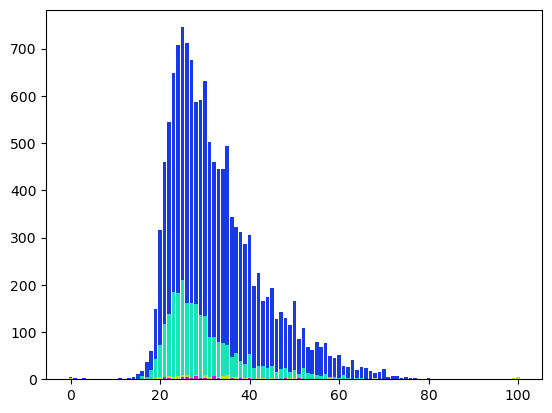

In [35]:
import matplotlib.pyplot as plt
total = dfg[0].sum()

p1 = plt.bar(dfg.loc[dfg['GenderSelect'] == 'Male']['Age']
             ,dfg.loc[dfg['GenderSelect'] == 'Male'][0]
             , color='#173AE3')

p1 = plt.bar(dfg.loc[dfg['GenderSelect'] == 'Female']['Age']
             ,dfg.loc[dfg['GenderSelect'] == 'Female'][0]
            , color='#17E3B5')

p1 = plt.bar(dfg.loc[dfg['GenderSelect'] == 'A different identity']['Age']
             ,dfg.loc[dfg['GenderSelect'] == 'A different identity'][0]
             , color='#BDE317')

p1 = plt.bar(dfg.loc[dfg['GenderSelect'] == 'Non-binary, genderqueer, or gender non-conforming']['Age']
             ,dfg.loc[dfg['GenderSelect'] == 'Non-binary, genderqueer, or gender non-conforming'][0]
             , color='#D217E3')


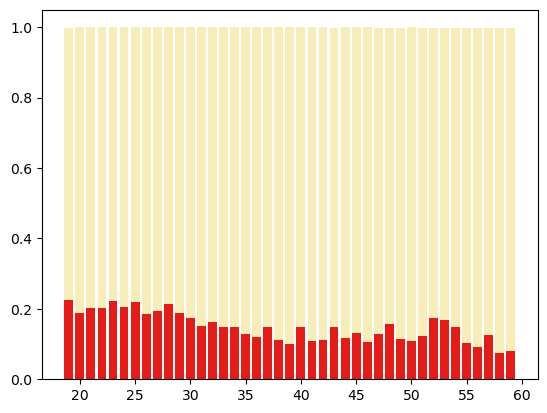

In [37]:
dfgf = dfg[(dfg['GenderSelect'] == 'Male' )|(dfg['GenderSelect'] == 'Female')]
dfgf = dfgf[(dfgf['Age'] > 18) & (dfgf['Age'] < 60)]
dfgfp = dfgf.pivot(index='Age', columns='GenderSelect', values=0)
for i in dfgfp.columns:
    dfgfp[i] = dfgfp[i]/(dfgfp['Female']+dfgfp['Male'])
dfgfp


dfgfp['Male'].index

p1 = plt.bar(dfgfp.index
             ,dfgfp['Male']
            , color='#E3C517'
            , alpha = 0.3)

p1 = plt.bar(dfgfp.index
             ,dfgfp['Female']
            , color='#E41B17')